In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Load the data
def load_data(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

# Load all datasets
train_challenges = load_data('../data/arc-agi_training_challenges.json')
train_solutions = load_data('../data/arc-agi_training_solutions.json')
eval_challenges = load_data('../data/arc-agi_evaluation_challenges.json')
eval_solutions = load_data('../data/arc-agi_evaluation_solutions.json')

print(f"Training tasks: {len(train_challenges)}")
print(f"Evaluation tasks: {len(eval_challenges)}")

Training tasks: 1000
Evaluation tasks: 120


Task ID: 00576224


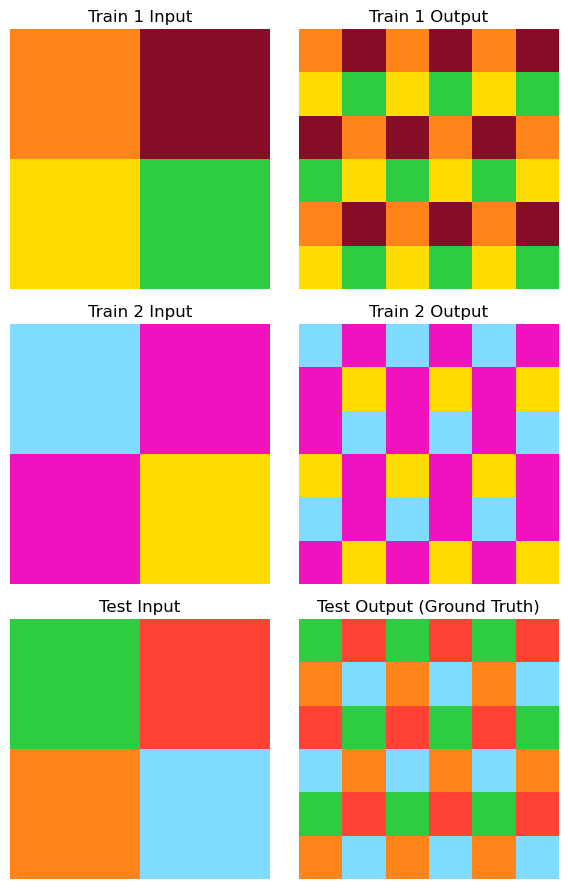

In [5]:
# Visualize a task
def plot_task(task, task_solutions=None):
    """
    Visualize train examples and test input/output
    """
    n_examples = len(task['train'])
    n_test = len(task['test'])
    
    fig, axes = plt.subplots(n_examples + n_test, 2, 
                             figsize=(6, 3*(n_examples + n_test)))
    
    # Color map for 0-9
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    # Plot training examples
    for i, example in enumerate(task['train']):
        axes[i, 0].imshow(example['input'], cmap=cmap, norm=norm)
        axes[i, 0].set_title(f'Train {i+1} Input')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(example['output'], cmap=cmap, norm=norm)
        axes[i, 1].set_title(f'Train {i+1} Output')
        axes[i, 1].axis('off')
    
    # Plot test examples
    for i, test in enumerate(task['test']):
        axes[n_examples + i, 0].imshow(test['input'], cmap=cmap, norm=norm)
        axes[n_examples + i, 0].set_title(f'Test Input')
        axes[n_examples + i, 0].axis('off')
        
        if task_solutions:
            axes[n_examples + i, 1].imshow(task_solutions[i], cmap=cmap, norm=norm)
            axes[n_examples + i, 1].set_title(f'Test Output (Ground Truth)')
            axes[n_examples + i, 1].axis('off')
        else:
            axes[n_examples + i, 1].text(0.5, 0.5, '?', 
                                         ha='center', va='center', fontsize=50)
            axes[n_examples + i, 1].set_title('Test Output (Unknown)')
            axes[n_examples + i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Pick a random task and visualize
task_id = list(train_challenges.keys())[0]
task = train_challenges[task_id]
solution = train_solutions[task_id]

print(f"Task ID: {task_id}")
plot_task(task, solution)


Task 1: 00576224


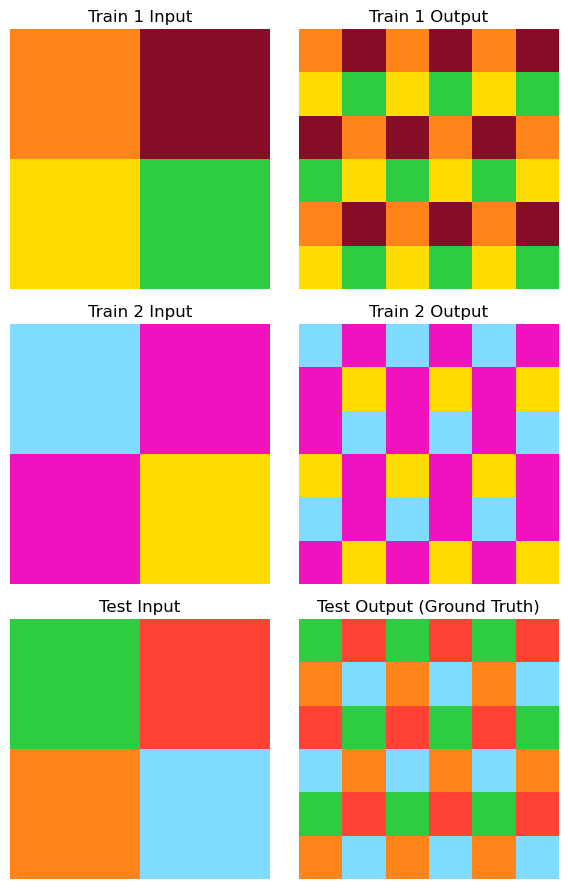


Task 2: 007bbfb7


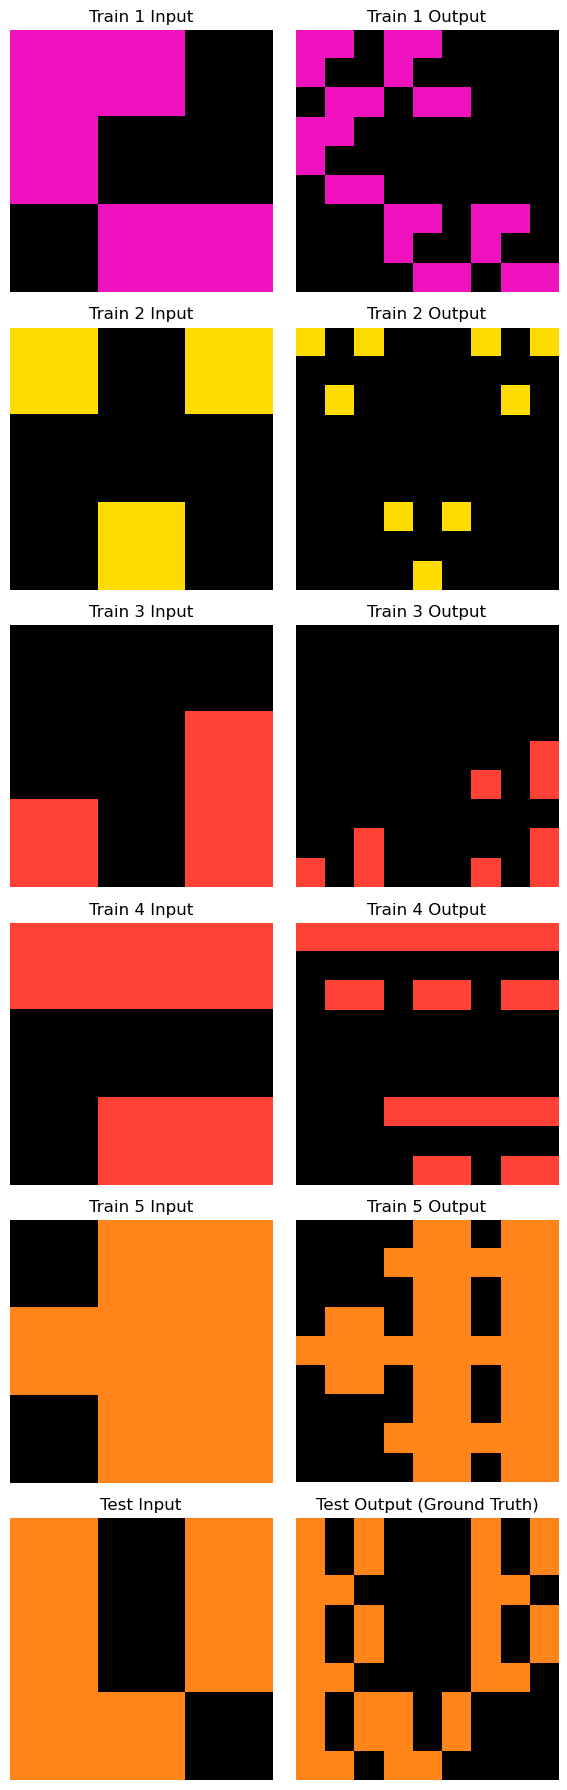


Task 3: 009d5c81


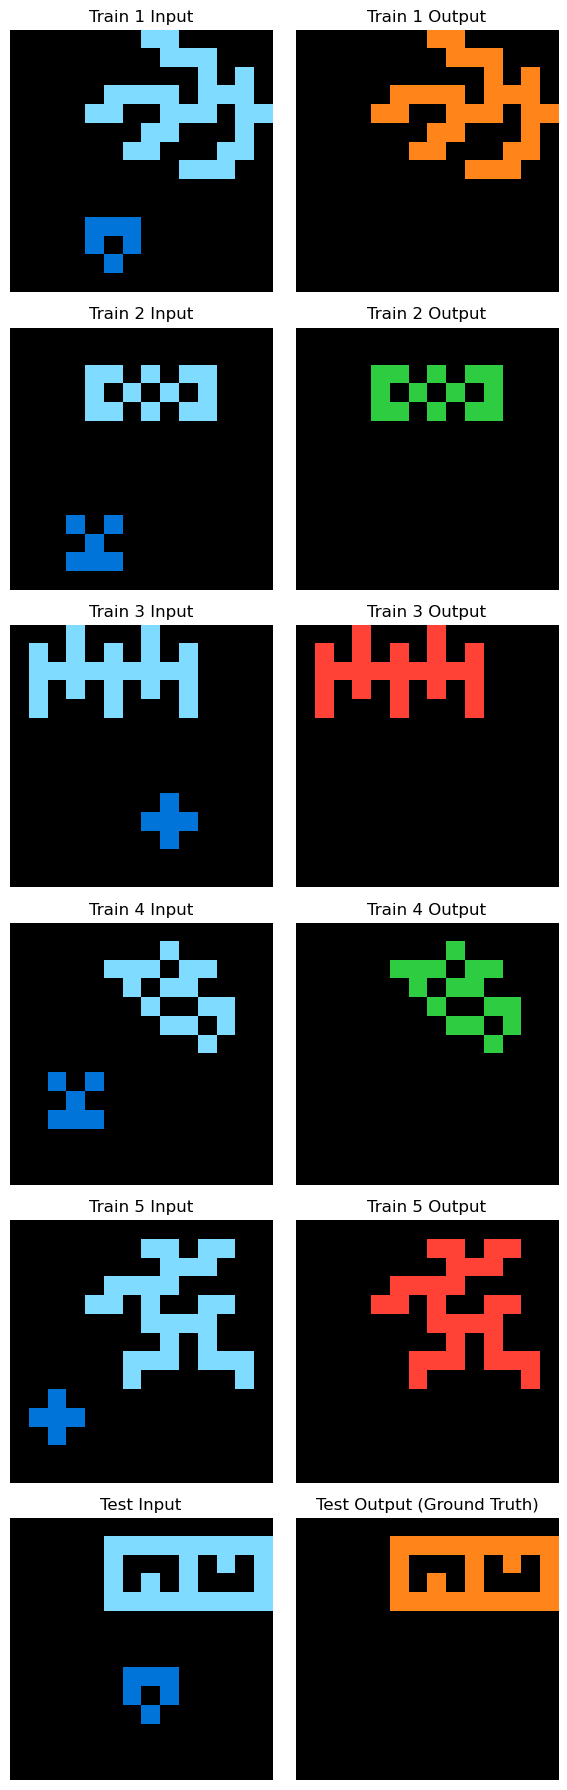


Task 4: 00d62c1b


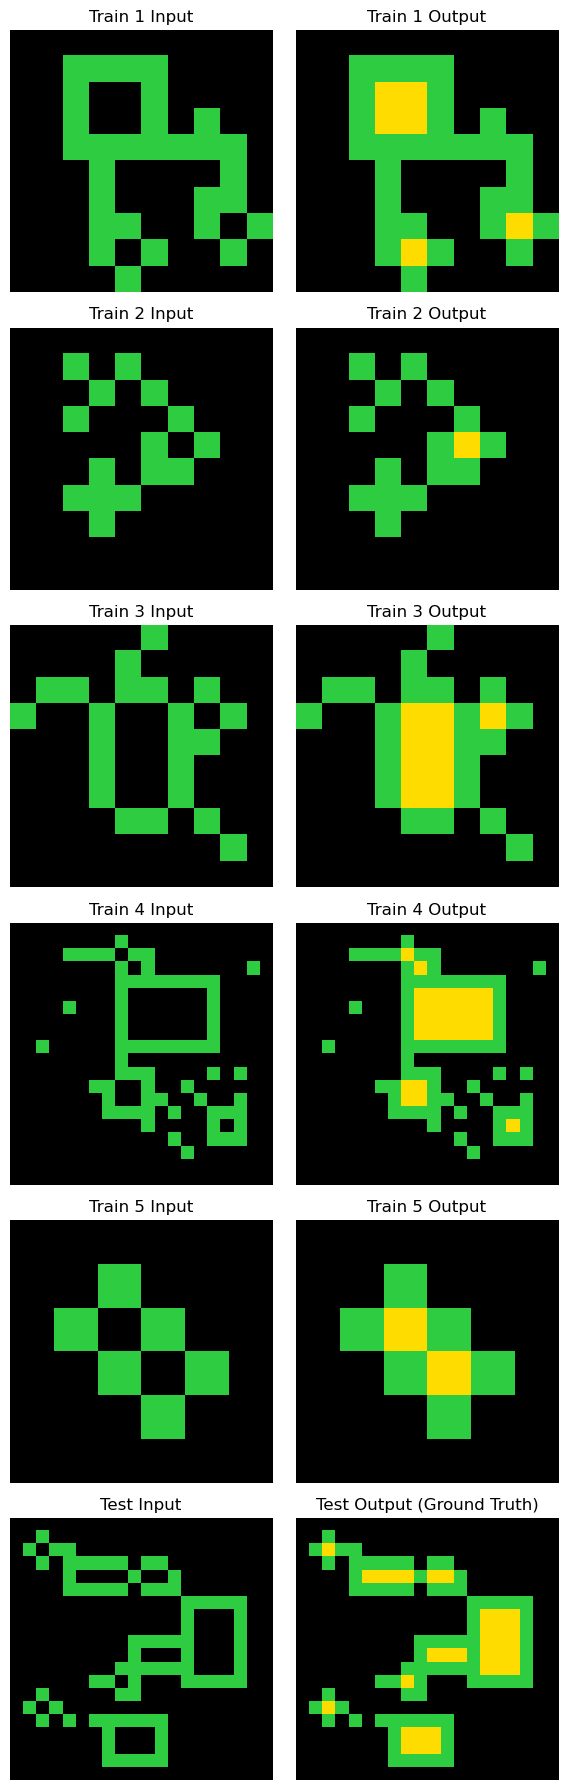


Task 5: 00dbd492


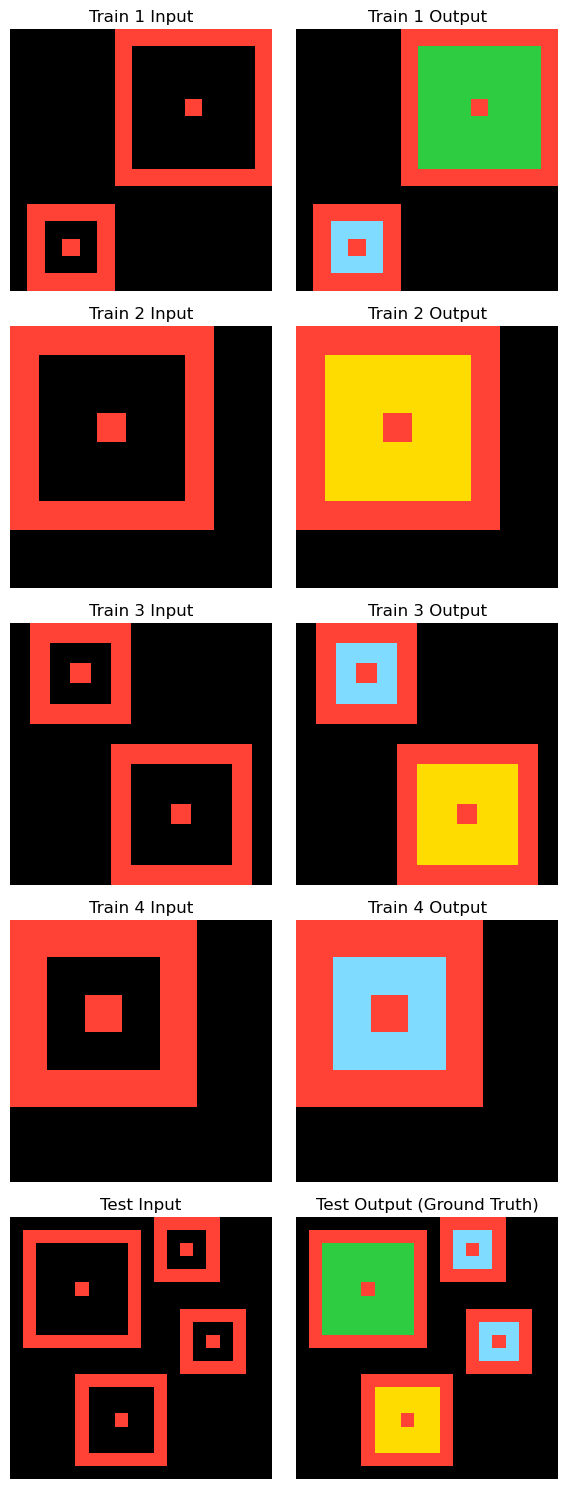

In [7]:
# Look at a few tasks to understand patterns
for i, task_id in enumerate(list(train_challenges.keys())[:5]):
    print(f"\n{'='*50}")
    print(f"Task {i+1}: {task_id}")
    print(f"{'='*50}")
    
    task = train_challenges[task_id]
    solution = train_solutions[task_id]
    
    plot_task(task, solution)

In [8]:
for i in range(5):
    t=list(train_challenges)[i]
    task=train_challenges[t]
    print(f'Set #{i}, {t}')

Set #0, 00576224
Set #1, 007bbfb7
Set #2, 009d5c81
Set #3, 00d62c1b
Set #4, 00dbd492


In [9]:
task = train_challenges['007bbfb7']
print(task.keys())

dict_keys(['train', 'test'])


In [19]:
#Test Ollama Integration
import ollama

def query_model(prompt, model='deepseek-r1:1.5b'):
    """Query local Ollama model"""
    response = ollama.generate(
        model=model,
        prompt=prompt,
        options={
            'temperature': 0.3,
            'num_predict': 4000  # Max tokens
        }
    )
    return response['response']

# Test with a simple task description
def describe_transformation(task):
    """Ask model to describe what transformation is happening"""
    
    # Format the task as text
    prompt = f"""Prompt:

You are an expert in abstract pattern recognition and rule inference. Your task is to analyze a set of input-output grid pairs (each pair representing one training example) and deduce the underlying transformation rule that consistently maps each input to its corresponding output.

For each task:

Describe the visual structure of the input grids (e.g., shapes, colors, positions, connectivity).
Identify the exact transformation applied to produce the output. Be specific:
Does it involve color changes? If so, under what conditions?
Does it involve shape deformation, rotation, scaling, or movement?
Are new elements added or removed? Based on what criteria?
Is there a relationship between different objects (e.g., size, position, relative arrangement)?
Assess the complexity of the rule: Is it simple (e.g., global color swap), conditional (e.g., "if X, then Y"), spatial (e.g., "move object to corner"), or compositional (e.g., "combine two patterns")?
State the rule clearly and concisely as a general principle that can be applied to any new input grid for this task.
Do not guess or invent rules. Base your answer strictly on the provided examples. Your goal is to provide a complete, unambiguous description of the transformation mechanism.

Train Example 1:
Input: {task['train'][0]['input']}
Output: {task['train'][0]['output']}

Train Example 2:
Input: {task['train'][1]['input']}
Output: {task['train'][1]['output']}

What is the transformation rule? Be specific about:
1. Grid size changes
2. Pattern changes
3. Color changes
4. Spatial transformations

Answer in 2-3 sentences."""

    return query_model(prompt)

# Test on Task 1 (the tessellation one)
task_id = '00576224'
task = train_challenges[task_id]

print("Testing DeepSeek R1 1.5B understanding:")
print("="*60)
description = describe_transformation(task)
print(description)

Testing DeepSeek R1 1.5B understanding:
<think>
Okay, so I need to figure out the transformation rule between the input and output grids based on the given examples. Let me start by looking at both inputs and outputs carefully.

In Train Example 1, the input is a 2x2 grid with numbers: [[7,9],[4,3]]. The output has six rows of varying lengths. Each row in the output seems to be an extension or expansion of the input. For instance, the first row of the output is [7,9,7,9,7,9], which is longer than the original 2x2 grid. Similarly, other rows are longer by two elements each.

Looking at Train Example 2, the input is [[8,6],[6,4]], and the output has six rows as well. The outputs here also appear to be longer versions of the input's rows. Each row in the output seems to have twice the length compared to the corresponding row in the input. For example, the first row [8,6] becomes [8,6,8,6], which is double the original.

So, it looks like for each element in the input grid, the correspondi

In [25]:
#"Solver with verification loop" = "Candidate generator + verifier pipeline"
import ollama
import json
import numpy as np
from copy import deepcopy

# ============================================================
# COMPONENT 1: CANDIDATE GENERATOR
# ============================================================

def generate_candidate(train_examples, test_input, model='deepseek-r1:1.5b', attempt_num=0):
    """
    Ask LLM to generate an output grid for the test input.
    """
    
    examples_text = ""
    for i, example in enumerate(train_examples):
        examples_text += f"\nExample {i+1}:\n"
        examples_text += f"Input: {example['input']}\n"
        examples_text += f"Output: {example['output']}\n"
    
    prompt = f"""Given these input-output examples, generate ONLY the output grid for the test input.

{examples_text}

Test input: {test_input}

Output the grid as a Python list with NO explanation, NO code, NO text. Just the grid.
Format: [[row1],[row2],...]

Grid:"""

    try:
        response = ollama.generate(
            model=model,
            prompt=prompt,
            options={
                'temperature': 0.7 + (attempt_num * 0.1),
                'num_predict': 800
            }
        )
        
        output_text = response['response']
        
        # DEBUG: Print what model generated
        if attempt_num < 2:  # Only print first 2 attempts
            print(f"\n--- Model output (attempt {attempt_num+1}) ---")
            print(output_text[:200])  # First 200 chars
            print("---")
        
        grid = parse_grid_from_text(output_text)
        return grid
        
    except Exception as e:
        print(f"Error: {e}")
        return None


def parse_grid_from_text(text):
    """
    Extract a 2D list from LLM output text.
    More robust parsing.
    """
    try:
        # Remove thinking tags
        text = text.replace('<think>', '').replace('</think>', '').strip()
        
        # Remove markdown code blocks if present
        text = text.replace('```python', '').replace('```', '').strip()
        
        # Find the list structure
        import re
        
        # Try to find [[...]] pattern
        pattern = r'\[\s*\[[\s\d,\[\]]+\]\s*\]'
        matches = re.findall(pattern, text, re.DOTALL)
        
        if matches:
            text = matches[0]
        else:
            # Last resort: just take everything between first [[ and last ]]
            start = text.find('[[')
            end = text.rfind(']]')
            if start != -1 and end != -1:
                text = text[start:end+2]
            else:
                return None
        
        # Clean up the text
        text = text.replace('\n', '').replace(' ', '')
        
        # Parse
        grid = eval(text)
        
        # Validate
        if isinstance(grid, list) and len(grid) > 0:
            if all(isinstance(row, list) for row in grid):
                # Check all numbers are 0-9
                valid = True
                for row in grid:
                    for val in row:
                        if not isinstance(val, (int, float)) or val < 0 or val > 9:
                            valid = False
                            break
                if valid:
                    return [[int(v) for v in row] for row in grid]
        
        return None
        
    except Exception as e:
        print(f"Parse error: {e}")
        return None


# ============================================================
# COMPONENT 2: VERIFIER
# ============================================================

def verify_candidate(candidate_output, train_examples, test_input):
    """
    Check if the candidate output is valid by verifying:
    1. The transformation that produces candidate_output from test_input
    2. Would also work on all training examples
    
    This is the KEY function - needs to be smart about finding the transformation
    """
    
    if candidate_output is None:
        return False
    
    # Basic validation
    if not isinstance(candidate_output, list) or len(candidate_output) == 0:
        return False
    
    if not all(isinstance(row, list) for row in candidate_output):
        return False
    
    # Check all values are 0-9
    for row in candidate_output:
        for val in row:
            if not isinstance(val, int) or val < 0 or val > 9:
                return False
    
    # TODO: This is where we need sophisticated verification logic
    # For now, just do basic checks
    
    # Check grid dimensions are reasonable
    h, w = len(candidate_output), len(candidate_output[0])
    if h > 30 or w > 30 or h < 1 or w < 1:
        return False
    
    # Check all rows same length
    if not all(len(row) == w for row in candidate_output):
        return False
    
    # For now, we can't fully verify the transformation is correct
    # This requires inferring what transformation was applied
    # We'll mark as "potentially valid" and rely on multiple attempts
    
    return True


# ============================================================
# MAIN SOLVER
# ============================================================

def solve_task(task, max_attempts=20, model='deepseek-r1:1.5b'):
    """
    Complete solver pipeline:
    1. Generate candidates
    2. Verify them
    3. Return best 2
    """
    
    train_examples = task['train']
    test_input = task['test'][0]['input']
    
    print(f"Solving task with {len(train_examples)} training examples")
    print(f"Test input size: {len(test_input)}x{len(test_input[0])}")
    
    valid_candidates = []
    
    for attempt in range(max_attempts):
        print(f"Attempt {attempt+1}/{max_attempts}...", end=' ')
        
        candidate = generate_candidate(train_examples, test_input, model, attempt)
        
        if candidate and verify_candidate(candidate, train_examples, test_input):
            print("✓ Valid candidate found")
            valid_candidates.append(candidate)
            
            if len(valid_candidates) == 2:
                print("Found 2 valid candidates, stopping")
                break
        else:
            print("✗ Invalid")
    
    # If we don't have 2, pad with best guess
    while len(valid_candidates) < 2:
        if len(valid_candidates) > 0:
            valid_candidates.append(valid_candidates[0])  # Duplicate first
        else:
            # Generate a fallback (just copy input or make blank grid)
            valid_candidates.append(test_input)
    
    return valid_candidates[:2]

In [27]:
# Test the pipeline
task_id = '00576224'
task = train_challenges[task_id]

attempts = solve_task(task, max_attempts=5)  # Start with 5 to test

print("\n" + "="*60)
print("Generated attempts:")
for i, attempt in enumerate(attempts):
    print(f"\nAttempt {i+1}:")
    print(np.array(attempt))
    
print("\n" + "="*60)
print("Ground truth:")
print(np.array(train_solutions[task_id][0]))

Solving task with 2 training examples
Test input size: 2x2
Attempt 1/5... 
--- Model output (attempt 1) ---
<think>
Alright, let's tackle this problem step by step. So, I have to generate an output grid based on the given input examples. Let me first understand what's going on here.

Looking at Example 1, t
---
✓ Valid candidate found
Attempt 2/5... 
--- Model output (attempt 2) ---
<think>
Okay, I need to figure out how to generate the output grid based on the given examples. Let me start by looking at the examples provided.

In Example 1, the input is a 2x2 matrix:
[[7, 9],
 [4
---
✓ Valid candidate found
Found 2 valid candidates, stopping

Generated attempts:

Attempt 1:
[[7 9]
 [4 3]]

Attempt 2:
[[7 9]
 [4 3]]

Ground truth:
[[3 2 3 2 3 2]
 [7 8 7 8 7 8]
 [2 3 2 3 2 3]
 [8 7 8 7 8 7]
 [3 2 3 2 3 2]
 [7 8 7 8 7 8]]


### We'll start simple with 3 strategies and can expand later.
Strategy 1: LLM Generation (already built)
Strategy 2: Simple Pattern Matching
Strategy 3: Basic Transformation

In [31]:
import numpy as np
from collections import Counter

# ============================================================
# STRATEGY 2: PATTERN MATCHING
# ============================================================

def pattern_matching_solver(task):
    """
    Detect common patterns: repetition, symmetry, color mapping
    """
    train_examples = task['train']
    test_input = task['test'][0]['input']
    
    candidates = []
    
    # Try 1: Simple color mapping
    candidate = try_color_mapping(train_examples, test_input)
    if candidate:
        candidates.append(candidate)
    
    # Try 2: Grid repetition/tiling
    candidate = try_tiling(train_examples, test_input)
    if candidate:
        candidates.append(candidate)
    
    # Try 3: Same size transformation
    candidate = try_same_size_transform(train_examples, test_input)
    if candidate:
        candidates.append(candidate)
    
    return candidates


def try_color_mapping(train_examples, test_input):
    """Check if it's a simple color swap"""
    try:
        # See if output is same size as input with colors changed
        if len(train_examples) == 0:
            return None
            
        ex = train_examples[0]
        inp, out = np.array(ex['input']), np.array(ex['output'])
        
        if inp.shape != out.shape:
            return None
        
        # Build color mapping
        color_map = {}
        for i in range(inp.shape[0]):
            for j in range(inp.shape[1]):
                color_map[inp[i,j]] = out[i,j]
        
        # Check if mapping is consistent across all examples
        for ex in train_examples[1:]:
            inp2, out2 = np.array(ex['input']), np.array(ex['output'])
            if inp2.shape != out2.shape:
                return None
            for i in range(inp2.shape[0]):
                for j in range(inp2.shape[1]):
                    if color_map.get(inp2[i,j]) != out2[i,j]:
                        return None
        
        # Apply to test input
        test_arr = np.array(test_input)
        result = np.zeros_like(test_arr)
        for i in range(test_arr.shape[0]):
            for j in range(test_arr.shape[1]):
                result[i,j] = color_map.get(test_arr[i,j], test_arr[i,j])
        
        return result.tolist()
        
    except:
        return None


def try_tiling(train_examples, test_input):
    """Check if output is input tiled/repeated"""
    try:
        ex = train_examples[0]
        inp, out = np.array(ex['input']), np.array(ex['output'])
        
        # Check if output is NxM repetition of input
        h_ratio = out.shape[0] // inp.shape[0]
        w_ratio = out.shape[1] // inp.shape[1]
        
        if h_ratio < 1 or w_ratio < 1:
            return None
            
        # Verify this pattern works
        expected = np.tile(inp, (h_ratio, w_ratio))
        if expected.shape != out.shape or not np.array_equal(expected, out):
            return None
        
        # Check other examples
        for ex in train_examples[1:]:
            inp2, out2 = np.array(ex['input']), np.array(ex['output'])
            expected2 = np.tile(inp2, (h_ratio, w_ratio))
            if expected2.shape != out2.shape or not np.array_equal(expected2, out2):
                return None
        
        # Apply to test
        test_arr = np.array(test_input)
        result = np.tile(test_arr, (h_ratio, w_ratio))
        return result.tolist()
        
    except:
        return None


def try_same_size_transform(train_examples, test_input):
    """Try simple same-size transformations"""
    try:
        ex = train_examples[0]
        inp, out = np.array(ex['input']), np.array(ex['output'])
        
        if inp.shape != out.shape:
            return None
        
        # Try rotation
        for k in [1, 2, 3]:  # 90, 180, 270 degrees
            if np.array_equal(np.rot90(inp, k), out):
                # Check other examples
                valid = True
                for ex2 in train_examples[1:]:
                    inp2, out2 = np.array(ex2['input']), np.array(ex2['output'])
                    if not np.array_equal(np.rot90(inp2, k), out2):
                        valid = False
                        break
                
                if valid:
                    test_arr = np.array(test_input)
                    return np.rot90(test_arr, k).tolist()
        
        # Try flip
        for axis in [0, 1]:
            if np.array_equal(np.flip(inp, axis), out):
                valid = True
                for ex2 in train_examples[1:]:
                    inp2, out2 = np.array(ex2['input']), np.array(ex2['output'])
                    if not np.array_equal(np.flip(inp2, axis), out2):
                        valid = False
                        break
                
                if valid:
                    test_arr = np.array(test_input)
                    return np.flip(test_arr, axis).tolist()
        
        return None
        
    except:
        return None


# ============================================================
# STRATEGY 3: RULE-BASED TRANSFORMATIONS
# ============================================================

def rule_based_solver(task):
    """Try common ARC transformation rules"""
    candidates = []
    
    # Try: Fill enclosed regions
    candidate = try_fill_enclosed(task)
    if candidate:
        candidates.append(candidate)
    
    # Try: Object extraction
    candidate = try_extract_objects(task)
    if candidate:
        candidates.append(candidate)
    
    return candidates


def try_fill_enclosed(task):
    """Fill enclosed black regions with colors"""
    # Placeholder - complex to implement properly
    return None


def try_extract_objects(task):
    """Extract connected components"""
    # Placeholder
    return None


# ============================================================
# MULTI-STRATEGY SOLVER
# ============================================================

def multi_strategy_solve(task, max_llm_attempts=10):
    """
    Combine all strategies to solve a task
    """
    print(f"\nSolving task...")
    all_candidates = []
    
    # Strategy 1: Pattern matching (fast)
    print("Strategy 1: Pattern matching...", end=' ')
    pattern_candidates = pattern_matching_solver(task)
    print(f"Found {len(pattern_candidates)} candidates")
    all_candidates.extend(pattern_candidates)
    
    # Strategy 2: Rule-based (fast)
    print("Strategy 2: Rule-based...", end=' ')
    rule_candidates = rule_based_solver(task)
    print(f"Found {len(rule_candidates)} candidates")
    all_candidates.extend(rule_candidates)
    
    # Strategy 3: LLM generation (slow, only if needed)
    if len(all_candidates) < 2:
        print(f"Strategy 3: LLM generation (up to {max_llm_attempts} attempts)...")
        for i in range(max_llm_attempts):
            candidate = generate_candidate(
                task['train'], 
                task['test'][0]['input'],
                attempt_num=i
            )
            if candidate:
                all_candidates.append(candidate)
                print(f"  Attempt {i+1}: Generated candidate")
            if len(all_candidates) >= 2:
                break
    
    # Remove duplicates
    unique_candidates = []
    for c in all_candidates:
        c_str = str(c)
        if not any(str(u) == c_str for u in unique_candidates):
            unique_candidates.append(c)
    
    print(f"Total unique candidates: {len(unique_candidates)}")
    
    # Return best 2
    return unique_candidates[:2] if len(unique_candidates) >= 2 else unique_candidates + [task['test'][0]['input']]

### Now test it:

Testing task: 05269061


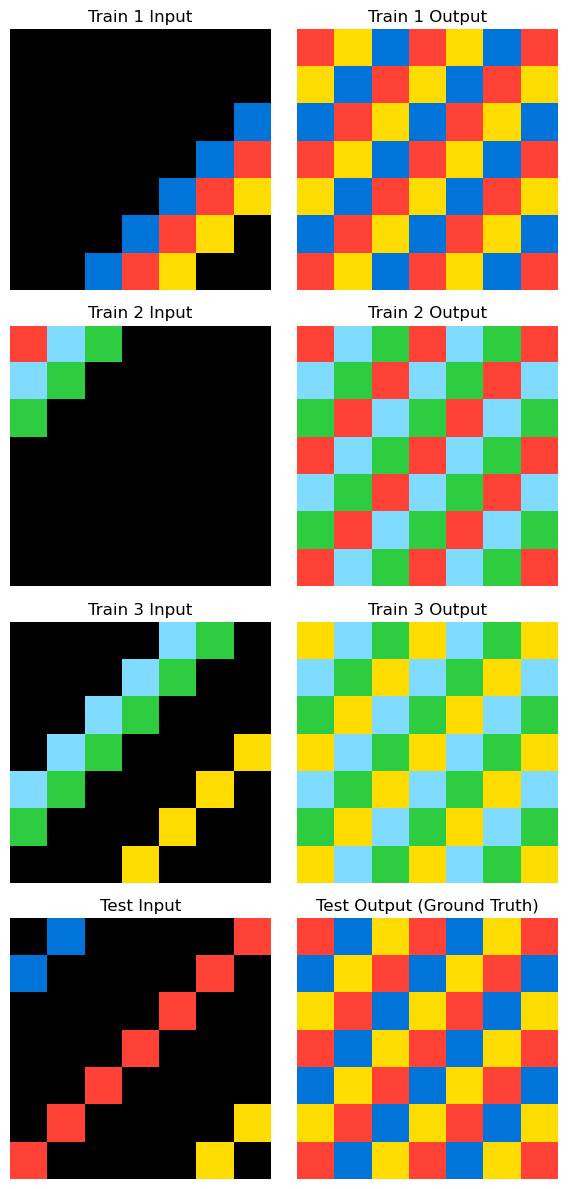


Solving task...
Strategy 1: Pattern matching... Found 0 candidates
Strategy 2: Rule-based... Found 0 candidates
Strategy 3: LLM generation (up to 5 attempts)...

--- Model output (attempt 1) ---
<think>
Okay, let me try to figure out how to solve this problem. So, I have these input grids and corresponding output grids. The task is to understand the pattern that transforms the input into the 
---
  Attempt 1: Generated candidate

--- Model output (attempt 2) ---
<think>
Okay, so I'm trying to figure out what the output should look like for this given input grid. Let me start by looking at the examples provided to see if there's a pattern or rule that transfor
---
  Attempt 3: Generated candidate
Total unique candidates: 1

Our predictions:

Attempt 1:


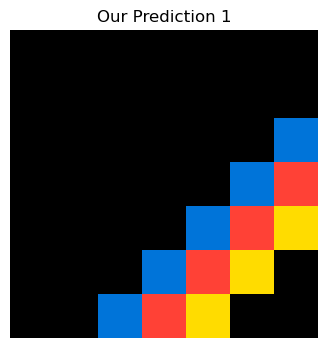


Attempt 2:


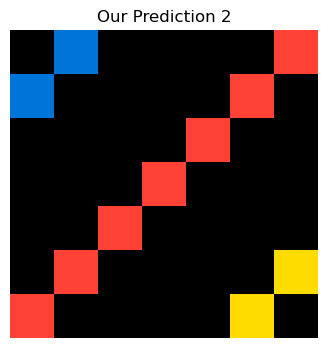


Ground truth:


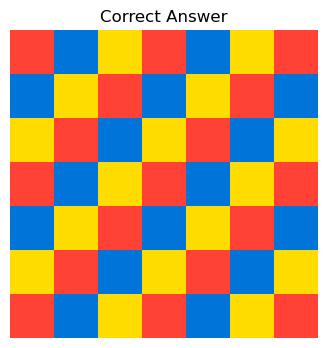

In [38]:
# Test on a simple task
task_id = list(train_challenges.keys())[10]  # Pick a random one
task = train_challenges[task_id]

print(f"Testing task: {task_id}")
plot_task(task, train_solutions[task_id])

attempts = multi_strategy_solve(task, max_llm_attempts=5)
Path A: Quick submission today (recommended)
from matplotlib import colors

# Define colormap
cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
print("\n" + "="*60)
print("Our predictions:")
for i, attempt in enumerate(attempts):
    print(f"\nAttempt {i+1}:")
    plt.figure(figsize=(4,4))
    plt.imshow(attempt, cmap=cmap, norm=norm)
    plt.title(f"Our Prediction {i+1}")
    plt.axis('off')
    plt.show()

print("\nGround truth:")
plt.figure(figsize=(4,4))
plt.imshow(train_solutions[task_id][0], cmap=cmap, norm=norm)
plt.title("Correct Answer")
plt.axis('off')
plt.show()

In [56]:
#Create submission format

def create_submission_json(test_challenges, solver_function):
    """
    Generate submission.json for all test tasks
    """
    submission = {}
    
    for task_id, task in test_challenges.items():
        print(f"Processing {task_id}...")
        
        try:
            # Get 2 attempts
            attempts = solver_function(task)
            
            # Ensure we have exactly 2 attempts
            if len(attempts) < 2:
                attempts.append(task['test'][0]['input'])  # Fallback: copy input
            
            # Format for each test output
            task_outputs = []
            for test_item in task['test']:
                task_outputs.append({
                    'attempt_1': attempts[0],
                    'attempt_2': attempts[1]
                })
            
            submission[task_id] = task_outputs
            
        except Exception as e:
            print(f"Error on {task_id}: {e}")
            # Fallback: just submit the input
            fallback = task['test'][0]['input']
            task_outputs = []
            for test_item in task['test']:
                task_outputs.append({
                    'attempt_1': fallback,
                    'attempt_2': fallback
                })
            submission[task_id] = task_outputs
    
    return submission


# Test on evaluation set first
eval_submission = create_submission_json(eval_challenges, multi_strategy_solve)

# Save it
import json
with open('../results/eval_submission.json', 'w') as f:
    json.dump(eval_submission, f)

print("Submission created!")

Processing 0934a4d8...

Solving task...
Strategy 1: Pattern matching... Found 0 candidates
Strategy 2: Rule-based... Found 0 candidates
Strategy 3: LLM generation (up to 10 attempts)...

--- Model output (attempt 1) ---
<think>
Alright, let's take a look at this problem. So, I have an input grid here that seems to be quite large and complicated with all these numbers and patterns. The task is to process this grid acc
---

--- Model output (attempt 2) ---
<think>
Okay, so I'm looking at this problem here where I have to transform an input grid into an output grid based on some rules or patterns. Let me try to figure out what's going on.

First, let's u
---
  Attempt 2: Generated candidate
  Attempt 4: Generated candidate
Total unique candidates: 2
Processing 135a2760...

Solving task...
Strategy 1: Pattern matching... Found 0 candidates
Strategy 2: Rule-based... Found 0 candidates
Strategy 3: LLM generation (up to 10 attempts)...

--- Model output (attempt 1) ---
<think>
Alright, let's 

<string>:1: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?



--- Model output (attempt 2) ---
<think>
Alright, let's tackle this problem step by step. First, I need to understand what exactly is being asked. The input consists of a list of lists, and the output should be another list of lists 
---
  Attempt 7: Generated candidate
Parse error: invalid syntax (<string>, line 1)
Total unique candidates: 1
Processing 16de56c4...

Solving task...
Strategy 1: Pattern matching... Found 0 candidates
Strategy 2: Rule-based... Found 0 candidates
Strategy 3: LLM generation (up to 10 attempts)...

--- Model output (attempt 1) ---
<think>
Okay, so I need to figure out the output grid based on the given input examples and the test case. Let's start by looking at the first example.

In Example 1:
Input is a 9x9 grid with mostly z
---

--- Model output (attempt 2) ---
<think>
Okay, I need to solve this problem where given an input grid and corresponding output grids based on some rules, generate only the output grid for a specific test case. Let me try to unde

KeyboardInterrupt: 

In [ ]:
#Score it locally
def score_submission(submission, solutions):
    """
    Score submission like Kaggle does
    """
    correct = 0
    total = 0
    
    for task_id, task_outputs in submission.items():
        ground_truth = solutions[task_id]
        
        for i, prediction in enumerate(task_outputs):
            total += 1
            gt = ground_truth[i]
            
            # Check if either attempt matches
            if (prediction['attempt_1'] == gt or 
                prediction['attempt_2'] == gt):
                correct += 1
    
    score = (correct / total) * 100
    return score, correct, total

score, correct, total = score_submission(eval_submission, eval_solutions)
print(f"Local Score: {score:.2f}% ({correct}/{total} correct)")

In [ ]:
#Test on 20 tasks
# Quick validation - just 20 tasks
sample_tasks = dict(list(eval_challenges.items())[:20])
sample_solutions = {k: eval_solutions[k] for k in sample_tasks.keys()}

print(f"Testing on {len(sample_tasks)} tasks...")

eval_submission = create_submission_json(
    sample_tasks, 
    lambda task: multi_strategy_solve(task, max_llm_attempts=3)  # Limit LLM attempts
)

score, correct, total = score_submission(eval_submission, sample_solutions)
print(f"\nScore on 20 tasks: {score:.2f}% ({correct}/{total})")